In [1]:
from keras.datasets import mnist
import numpy as np

2023-08-15 12:50:56.234127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-15 12:50:56.256220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-15 12:50:56.256629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 12:50:56.726938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_data, train_labels), _ = mnist.load_data()
train_data = train_data.reshape((train_data.shape[0], -1))
train_data = train_data.astype(np.float32) / 255

train_data_with_noise = np.concatenate([
    train_data,
    np.random.random(train_data.shape)
], axis=1)

train_data_with_zero = np.concatenate([
    train_data,
    np.zeros(train_data.shape)
], axis=1)

In [3]:
from keras import models, layers, activations, optimizers, losses, metrics

def get_model():
    model = models.Sequential([
        layers.Dense(512, activation=activations.relu),
        layers.Dense(10, activation=activations.softmax)
    ])
    model.compile(optimizer=optimizers.RMSprop(),
                  loss=losses.sparse_categorical_crossentropy,
                  metrics=[metrics.sparse_categorical_accuracy])
    return model

model = get_model()
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_noise = model.fit(train_data_with_noise, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zero = model.fit(train_data_with_zero, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2023-08-15 12:50:57.808094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-15 12:50:57.808352: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


375/375 [==============================] - 1s 2ms/step - loss: 0.2960 - sparse_categorical_accuracy: 0.9138 - val_loss: 0.1596 - val_sparse_categorical_accuracy: 0.9550
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1238 - sparse_categorical_accuracy: 0.9633 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9759 - val_loss: 0.0890 - val_sparse_categorical_accuracy: 0.9745
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0588 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0838 - val_sparse_categorical_accuracy: 0.9750
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0436 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0763 - val_sparse_categorical_accuracy: 0.9774
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0326 - sparse_categorical_accuracy:

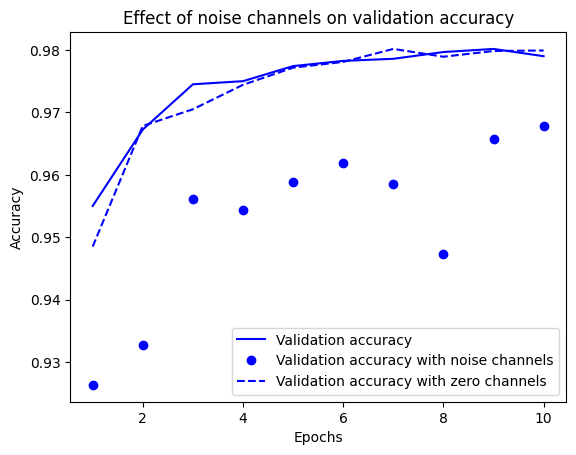

In [4]:
import matplotlib.pyplot as plt

val_acc = history.history['val_sparse_categorical_accuracy']
val_acc_noise = history_noise.history['val_sparse_categorical_accuracy']
val_acc_zero = history_zero.history['val_sparse_categorical_accuracy']

epochs = range(1, 11)

plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.plot(epochs, val_acc_noise, 'bo', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zero, 'b--', label='Validation accuracy with zero channels')

plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [5]:
train_labels_shuffle = np.copy(train_labels)
np.random.shuffle(train_labels_shuffle)

model = get_model()
model.fit(train_data, train_labels_shuffle, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3151 - sparse_categorical_accuracy: 0.1050 - val_loss: 2.3055 - val_sparse_categorical_accuracy: 0.1042
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2988 - sparse_categorical_accuracy: 0.1182 - val_loss: 2.3109 - val_sparse_categorical_accuracy: 0.0986
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2900 - sparse_categorical_accuracy: 0.1265 - val_loss: 2.3174 - val_sparse_categorical_accuracy: 0.1009
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2785 - sparse_categorical_accuracy: 0.1384 - val_loss: 2.3250 - val_sparse_categorical_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2630 - sparse_categorical_accuracy: 0.1524 - val_loss: 2.3314 - val_sparse_categorical_accuracy: 0.1047
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2451 - sparse_cate

In [8]:
model = models.Sequential([
    layers.Dense(512, activation=activations.relu),
    layers.Dense(10, activation=activations.softmax)
])
model.compile(optimizer=optimizers.RMSprop(0.1),
                loss=losses.sparse_categorical_crossentropy,
                metrics=[metrics.sparse_categorical_accuracy])
model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 6.4000 - sparse_categorical_accuracy: 0.8232 - val_loss: 0.5452 - val_sparse_categorical_accuracy: 0.8988
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.6328 - sparse_categorical_accuracy: 0.8849 - val_loss: 0.5000 - val_sparse_categorical_accuracy: 0.9115
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.5779 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.6019 - val_sparse_categorical_accuracy: 0.9087
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.5211 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.4715 - val_sparse_categorical_accuracy: 0.9216
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.5183 - sparse_categorical_accuracy: 0.9061 - val_loss: 0.5843 - val_sparse_categorical_accuracy: 0.9160
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.5042 - sparse_categorica

Epoch 1/20
375/375 [==============================] - 0s 896us/step - loss: 0.6649 - sparse_categorical_accuracy: 0.8382 - val_loss: 0.3604 - val_sparse_categorical_accuracy: 0.9035
Epoch 2/20
375/375 [==============================] - 0s 713us/step - loss: 0.3529 - sparse_categorical_accuracy: 0.9032 - val_loss: 0.3087 - val_sparse_categorical_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 0s 694us/step - loss: 0.3176 - sparse_categorical_accuracy: 0.9118 - val_loss: 0.2930 - val_sparse_categorical_accuracy: 0.9186
Epoch 4/20
375/375 [==============================] - 0s 680us/step - loss: 0.3019 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.2824 - val_sparse_categorical_accuracy: 0.9221
Epoch 5/20
375/375 [==============================] - 0s 635us/step - loss: 0.2921 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.2787 - val_sparse_categorical_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 0s 663us/step - loss: 0.2856 - spars

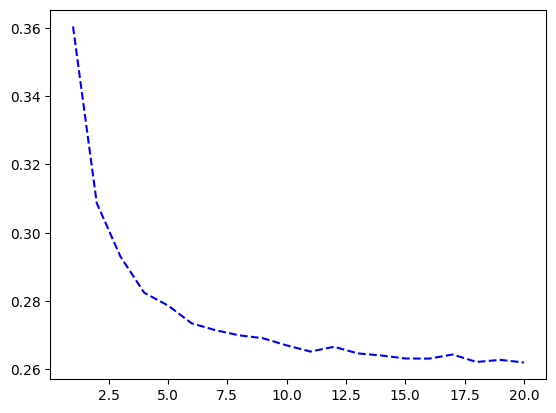

In [11]:
model = models.Sequential([layers.Dense(10, activation=activations.softmax)])
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])
history_small_model = model.fit(train_data, train_labels, epochs=20, batch_size=128, validation_split=0.2)

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--', label = 'Validation loss')

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3644 - sparse_categorical_accuracy: 0.8974 - val_loss: 0.1939 - val_sparse_categorical_accuracy: 0.9432
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1635 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.1358 - val_sparse_categorical_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1140 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1089 - val_sparse_categorical_accuracy: 0.9693
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0875 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.0969 - val_sparse_categorical_accuracy: 0.9715
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0701 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.1025 - val_sparse_categorical_accuracy: 0.9708
Epoch 6/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0570 - sparse_categorica

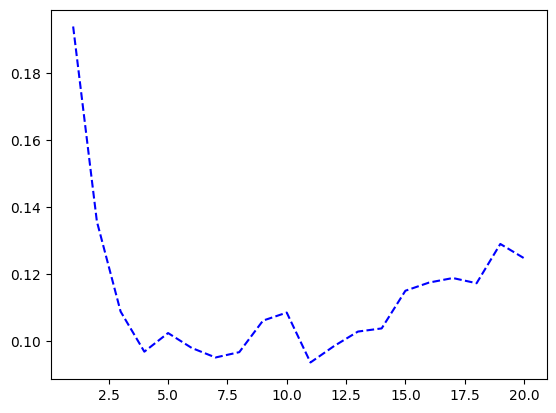

In [12]:
model = models.Sequential([
    layers.Dense(96, activation=activations.relu),
    layers.Dense(96, activation=activations.relu),
    layers.Dense(10, activation=activations.softmax)
    ])
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])
history_small_model = model.fit(train_data, train_labels, epochs=20, batch_size=128, validation_split=0.2)

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--', label = 'Validation loss')

In [15]:
from keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def encode_one_hot(sequences, dimensions=10000):
    rep_one_hot = np.zeros(shape=(len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        rep_one_hot[i, sequence] = 1
    return rep_one_hot

x_train = encode_one_hot(train_data)
y_train = train_labels

In [16]:
model = models.Sequential([
    layers.Dense(16, activation=activations.relu),
    layers.Dense(16, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_original = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5272 - binary_accuracy: 0.7761 - val_loss: 0.4317 - val_binary_accuracy: 0.8166
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3298 - binary_accuracy: 0.8897 - val_loss: 0.3159 - val_binary_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2436 - binary_accuracy: 0.9189 - val_loss: 0.3050 - val_binary_accuracy: 0.8740
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1963 - binary_accuracy: 0.9337 - val_loss: 0.2773 - val_binary_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1617 - binary_accuracy: 0.9463 - val_loss: 0.2815 - val_binary_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1413 - binary_accuracy: 0.9518 - val_loss: 0.2911 - val_binary_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1

In [17]:
model_small = models.Sequential([
    layers.Dense(4, activation=activations.relu),
    layers.Dense(4, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])
model_small.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_small = model_small.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6168 - binary_accuracy: 0.6474 - val_loss: 0.5703 - val_binary_accuracy: 0.7882
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5257 - binary_accuracy: 0.7960 - val_loss: 0.5167 - val_binary_accuracy: 0.8112
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4724 - binary_accuracy: 0.8617 - val_loss: 0.5017 - val_binary_accuracy: 0.7899
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4238 - binary_accuracy: 0.8961 - val_loss: 0.4612 - val_binary_accuracy: 0.8294
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3639 - binary_accuracy: 0.9219 - val_loss: 0.4176 - val_binary_accuracy: 0.8429
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3020 - binary_accuracy: 0.9362 - val_loss: 0.3519 - val_binary_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2

In [24]:
model_large = models.Sequential([
    layers.Dense(512, activation=activations.relu),
    layers.Dense(512, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])
model_large.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_large = model_large.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5695 - binary_accuracy: 0.7185 - val_loss: 0.3834 - val_binary_accuracy: 0.8413
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3162 - binary_accuracy: 0.8723 - val_loss: 0.6573 - val_binary_accuracy: 0.7264
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2361 - binary_accuracy: 0.9071 - val_loss: 0.2843 - val_binary_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1928 - binary_accuracy: 0.9243 - val_loss: 0.3047 - val_binary_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1511 - binary_accuracy: 0.9438 - val_loss: 0.3156 - val_binary_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1103 - binary_accuracy: 0.9575 - val_loss: 0.3329 - val_binary_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - los

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


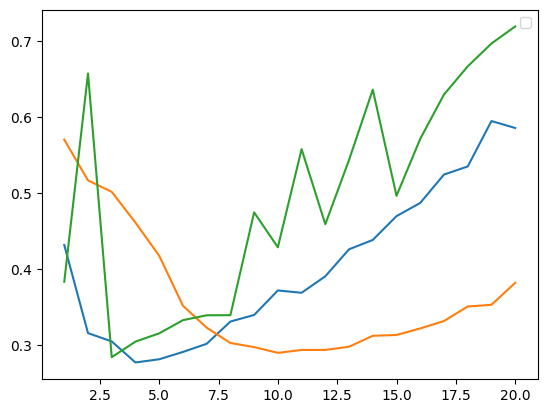

In [25]:
epochs = range(1, 21)
plt.plot(epochs, history_original.history['val_loss'])
plt.plot(epochs, history_small.history['val_loss'])
plt.plot(epochs, history_large.history['val_loss'])
plt.legend()